# **Practice 2: On the Stability of Continues Linear Dynamical Systems**
## **Goals for today**

---



During today practice we will:
*   Recall what the solution of ODE and study their stability
*   Check stability criteria for particular cases of ODE
*   Discuss why do we need for our system to be stable

## **Solutions of ODE**
While studying ODE $\dot{\mathbf{x}} = \boldsymbol{f}(\mathbf{x}, \mathbf{u}, t)$, one is often interested in its solution $\mathbf{x}^*(t)$ (integral curve):
\begin{equation}
\mathbf{x}^*(t) = \int_{t_0}^{t_f} \boldsymbol{f}(t,\mathbf{x}(t),\mathbf{u}(t))dt,\quad \text{s.t: } \mathbf{x}(t_0) = \mathbf{x}_0
\end{equation}


---


In most practical situations the integral above cannot be solved analyticaly and one should consider numerical integration instead, however when we deal with LTI systems like:
\begin{equation}
\mathbf{\dot{x}} (t)=\mathbf{A}\mathbf{x}(t)
\end{equation}
An integral above can be calculated analytically:
\begin{equation}
\mathbf{x}^*(t)=e^{\mathbf{A}t}\mathbf{x}(0)
\end{equation}
where matrix exponential is defined via power series:
\begin{equation} 
 e^{\mathbf{A}t}=\sum _{k=0}^{\infty }{1 \over k!}\mathbf{A}^{k}t^k
 \end{equation}




---



> A natural questions to ask:
*   How to calculate this matrix exponential without power series?
*   Can we analyze the behaviour of solutions without explicitly solving ODE?

Let us first consider the first question, assume for a while that we can do the following factorization:
\begin{equation}
\mathbf{A}=\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1}  
\end{equation}
where: 


*   $\mathbf{Q}\in \mathbb{R}^{n \times n}$ containing normalized eigen vectors $\mathbf{q}_i = \frac{\mathbf{v}_i}{\|\mathbf{v}_i\|}$ as columns. 
*   $\mathbf{\Lambda}\in \mathbb{R}^{n \times n}$ diagonal matrix whose diagonal elements are the corresponding eigenvalues $\Lambda_{ii} = \lambda_i$. 



In [24]:
# Note Eigen decomposition via Python
import numpy as np

A = [[2., 5.],
     [1., 3.]]

A = np.array(A)

print(f"Original matrix:\n{A}\n")

Lambda, Q = np.linalg.eig(A)
print(f"Eigen values:\n{Lambda}, \n\n Eigen vectors:\n{Q}\n")

Qinv = np.linalg.inv(Q)
A_rec = (Q.dot(np.diag(Lambda))).dot(Qinv)
print(f"Reconstructed matrix:\n{A_rec}")

Original matrix:
[[2. 5.]
 [1. 3.]]

Eigen values:
[0.20871215 4.79128785], 

 Eigen vectors:
[[-0.94140906 -0.87315384]
 [ 0.33726692 -0.48744474]]

Reconstructed matrix:
[[2. 5.]
 [1. 3.]]


Substitution to the system dynamics and multiplying by $\mathbf{Q}^{-1}$ yields:
\begin{equation}
\mathbf{Q}^{-1}\mathbf{\dot{x}} =\mathbf{Q}^{-1}\mathbf{A}\mathbf{x} =\mathbf{Q}^{-1}\mathbf{Q}\mathbf{\Lambda} \mathbf{Q}^{-1}\mathbf{x} = \mathbf{\Lambda} \mathbf{Q}^{-1}\mathbf{x}
\end{equation}

Thus defining new variables $\mathbf{z} = \mathbf{Q}^{-1}\mathbf{x}$ yields:
\begin{equation}
\dot{\mathbf{z}} = \mathbf{\Lambda}\mathbf{z}
\end{equation}
Which is in fact just a system of decoupled equations:
\begin{equation}
\dot{z}_i = \lambda_i z_i,\quad i = 1,2\dots,n
\end{equation}
with known solutions:
\begin{equation}
z^*_i = e^{\lambda_i t} z_i(0)
\end{equation}


---


>**NOTE:** Another way to decompose our system is by applying following property of matrix exponential:
\begin{equation}
e^{\mathbf{Y}\mathbf{X}\mathbf{Y}^{-1}} = \mathbf{Y}e^{\mathbf{X}}\mathbf{Y}^{-1}
\end{equation}
where $\mathbf{Y}$ is invertable


---

>### **Bonus Exercise**
> Compare the solutions given by matrix exponential with one given by numerical integration for LTI system with diagonizable $\mathbf{A}$.


In [25]:
# Put your code here

##**Basics on the Eigenvalues and Eigenvectors**

A (non-zero) vector v of dimension N is an eigenvector of a square N × N matrix A if it satisfies the linear equation

\begin{equation}
\mathbf {v} =\lambda \mathbf {v}
\end{equation}

where $\lambda$ is a scalar, termed the eigenvalue corresponding to $\mathbf{v}$. 

This yields an equation for the eigenvalues

\begin{equation}
\det \left(\mathbf {A} -\lambda \mathbf {I} \right)=0
\end{equation}
We call $\Delta(\lambda)$ the characteristic polynomial, and the equation, called the characteristic equation, is an $n$ - th order polynomial equation in the unknown $\lambda$ with $N_\lambda$ solutions$  

We can factor $\Delta(\lambda)$ as
\begin{equation}
\Delta(\lambda)=\left(\lambda -\lambda _{1}\right)^{k_{1}}\left(\lambda -\lambda _{2}\right)^{k_{2}}\cdots \left(\lambda -\lambda _{N_{\lambda }}\right)^{k_{N_{\lambda }}}=0.
\end{equation}

The integer $k_i$ is termed the algebraic multiplicity of eigenvalue $\lambda_i$. If the field of scalars is algebraically closed, the algebraic multiplicities sum to N:
\begin{equation}
 \sum \limits _{i=1}^{N_{\lambda }}{k_{i}}=n
\end{equation}
For each eigenvalue $\lambda_i$ we have a specific equation:
\begin{equation}
\left(\mathbf {A} -\lambda _{i}\mathbf {I} \right)\mathbf {v} =0
\end{equation}

There will be $1 ≤ m_i ≤ k_i$ linearly independent solutions to each eigenvalue equation. 
The linear combinations of the $m_i$ solutions are the eigenvectors associated with the eigenvalue $\lambda_i$. The integer $m_i$ is termed the geometric multiplicity of $\lambda_i$. The total number of linearly independent eigenvectors $N_\mathbf{v}$ can be calculated by summing the geometric multiplicities
\begin{equation}
\sum \limits _{i=1}^{N_{\lambda }}{m_{i}}=N_{\mathbf {v}}
\end{equation}

>**QUESTION:** What are the relationship between $N_{\mathbf {v}}$ and rank of $\mathbf{Q}$



---
>### **Exercises**
>
> Find eigen system (values and vectors) of following matrices by hand, compare your solution with result of numerical routine:
>$$
\begin{bmatrix} 0 & 1 \\ -5 & -2
\end{bmatrix},\quad
\begin{bmatrix} 0 & 8 \\ 1 & 3
\end{bmatrix}
,\quad
\begin{bmatrix} 0 & 8 \\ 6 & 0
\end{bmatrix}
,\quad
\begin{bmatrix} 0 & 1 \\ -3 & 0
\end{bmatrix}
$$




In [26]:
A = [[0, 1],
     [2, 0]]

# A = [[-1, 2],
#      [-2, -1]]

Lambda, Q = np.linalg.eig(A)
print(f"Eigen values:\n{Lambda}, \n\n Eigen vectors:\n{Q}")

Eigen values:
[ 1.41421356 -1.41421356], 

 Eigen vectors:
[[ 0.57735027 -0.57735027]
 [ 0.81649658  0.81649658]]


## **Intro to Stability**

Various types of stability may be discussed for the solutions of differential equations or difference equations describing dynamical systems. The one practically important type is that concerning the stability of solutions near to a point of equilibrium. This may be ,analyzed by the theory of **Aleksandr Lyapunov**. 

In simple terms, if the solutions that start out near an equilibrium point $\mathbf{x}_{0}$ stay near $\mathbf{x}_{0}$ forever, then $\mathbf{x}_{0}$ is Lyapunov stable. More strongly, if $\mathbf{x}_{0}$ is Lyapunov stable and all solutions that start out near $\mathbf{x}_{0}$ converge to $\mathbf{x}_0$, then $\mathbf{x}_{0}$ is asymptotically stable. 



---
A strict deffenitions are as follows:

Equilibrium $\mathbf{x}_0$ is said to be:

*   **Lyapunov stable** if:
\begin{equation}
\forall \epsilon>0,\exists\delta>0, \|\mathbf{x}(0) - \mathbf{x}_0\|<\delta \rightarrow \|\mathbf{x}(t) - \mathbf{x}_0\|<\epsilon, \quad \forall t
\end{equation}
*   **Asymptotically stable** if it is Lyapunov stable and:
\begin{equation}
\exists \delta >0, \|\mathbf{x}(0) - \mathbf{x}_0\|< \delta, \rightarrow \lim_{t\to\infty} \|\mathbf{x}(t) - \mathbf{x}_0\| = 0, \quad \forall t
\end{equation}
*   **Exponentially stable** if it is asymptotically stable and:
\begin{equation}
\exists \delta, \alpha, \beta >0, \|\mathbf{x}(0) - \mathbf{x}_0\|< \delta, \rightarrow  \|\mathbf{x}(t) - \mathbf{x}_0\| \leq\alpha\|\mathbf{x}(0) - \mathbf{x}_0\|^{-{\beta}t}, \quad \forall t  
\end{equation}

Conceptually, the meanings of the above terms are the following:


*   **Lyapunov stability** of an equilibrium means that solutions starting "close enough" to the equilibrium (within a distance $\delta$  from it) remain "close enough" forever
*   **Asymptotic stability** means that solutions that start close enough not only remain close enough but also eventually converge to the equilibrium.
*  **Exponential** stability means that solutions not only converge, but in fact converge faster than or at least as fast as a particular known rate $\alpha\|\mathbf{x}(0) - \mathbf{x}_0\|^{-{\beta}t}$

---


The solution $z_i =  e^{\lambda_i t}z_i(0)$ can be decomposed using Euler's identity:
\begin{equation}
    z_i =  e^{\lambda_i t}z_i(0) =
    e^{(\alpha_i + i \beta_i) t}z_i(0) =
    e^{\alpha_i t} 
          e^{i \beta_i t}z_i(0) = 
    e^{\alpha_i t} 
    (\cos(\beta_i t) + i \sin(\beta_i t))z_i(0)
\end{equation}
where $\lambda_i = \alpha_i + i \beta_i, \operatorname{Re}{\lambda_i} = \alpha_i, \operatorname{Im}{\lambda_i} = \beta_i$


---
Since $\| (\cos(\beta_i t) + i \sin(\beta_i t))\| =1$ thus, norm of $z_i$:

* Bounded if $\operatorname{Re}{\lambda_i} = \alpha_i = 0$, hence the system is **Lyapunov stable**. 
* Decreasing if $\operatorname{Re}{\lambda_i} = \alpha_i < 0$, hence the system is **asymptotically** and moreover **exponentially** stable. 
* Increasing if $\operatorname{Re}{\lambda_i} = \alpha_i > 0$, hence the system is **unstable**. 
---


>**QUESTION:** how norms $\|\mathbf{z}\|$ and $\|\mathbf{x}\|$ are related?

Eigen values:
[0.+2.64575131j 0.-2.64575131j], 

 Eigen vectors:
[[0.        -0.35355339j 0.        +0.35355339j]
 [0.93541435+0.j         0.93541435-0.j        ]]




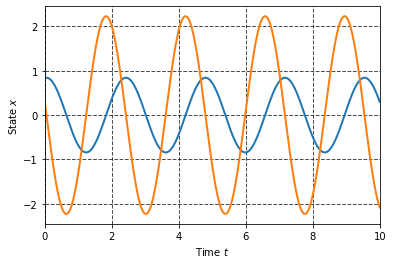

In [27]:
from scipy.integrate import odeint
from matplotlib.pyplot import *

A = [[0, 1],
     [-7, 0]]

A = np.array(A)
n = np.shape(A)[0]

Lambda, Q = np.linalg.eig(A)
print(f"Eigen values:\n{Lambda}, \n\n Eigen vectors:\n{Q}\n\n")

# x_dot from state space
def f(x, t):
    return A.dot(x)

t0 = 0 # Initial time 
tf = 10 # Final time
t = np.linspace(t0, tf, 1000)

x0 = np.random.rand(n)  # initial state

solution = {"ss": odeint(f, x0, t)}

plot(t, solution['ss'], linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'State ${x}$')
xlabel(r'Time $t$')
show()


 >### **Exercises**
> 1) Conclude the stability of the LTI systems $\dot{ \mathbf{x}} = \mathbf{A} \mathbf{x}$ with matrices $\mathbf{A}$ given in previous exercise.
>
> 2) Check the stability of the following systems (numerically)
>
>* $3 z^{(2)} -7    z  = 0$
>* $ z^{(3)} - 3   \ddot z  + 2z  = 0$
>* $10 z^{(4)} -7  z^{(3)} + 2   \ddot z + 0.5 \dot z + 4z  = 0$
>
>3) Consider the mass-spring-damper system:
><p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1ouEckIc8hm6IOTJ5uGVJHCwx2tBeyKj8" align="center" hspace="350px" vspace="0px"></p>
>
> with dynamics given by
> \begin{equation}
m \ddot y + b \dot y + k y = 0 
\end{equation} 
>
>What are the conditions on the real $m, b, k$ for this system to be stable?


## **Basics of Phase Space Analysys**

---

In dynamical system theory, a **phase space** $\mathcal{S}$ is a space in which all possible states $\mathbf{x}$ of a system are represented, with each possible state corresponding to one unique point in the phase space. The concept of phase space was developed in the late 19th century by *Ludwig Boltzmann*, *Henri Poincaré*, and *Josiah Willard Gibbs*.

Phase space is great tool to graphically analyze systems up to third order, without actually solving their related ODEs.

One can build the phase portrait by plotting the vectors $\dot{\mathbf{x}}_i$:
\begin{equation}
\dot{\mathbf{x}}_i = \mathbf{f}(\mathbf{x}_i)
\end{equation}

Thus for choosen points $\mathbf{x}_i$ you may analyze the tendency of your states dynamics, via $\dot{\mathbf{x}}_i$

---
 ### **Example**

Let us consider the example of "love" equations given in the first practice:
\begin{equation}
\begin{bmatrix}
\dot{J} \\
\dot{R} 
\end{bmatrix} = 
\begin{bmatrix}
-b  R \\
a J
\end{bmatrix} \rightarrow \dot{\mathbf{x}} = \mathbf{A} \mathbf{x}
\end{equation}
with $a, b >0$

Let us plot the solution of this equation in phase plane:

In [28]:
A = [[1, -1],
     [1, -1]]

A = np.array(A)
n = np.shape(A)[0]

Lambda, Q = np.linalg.eig(A)
print(f"Eigen values:\n{Lambda}, \n\n Eigen vectors:\n{Q}\n\n")


Eigen values:
[3.25176795e-17+1.57009246e-16j 3.25176795e-17-1.57009246e-16j], 

 Eigen vectors:
[[0.70710678+1.11022302e-16j 0.70710678-1.11022302e-16j]
 [0.70710678+0.00000000e+00j 0.70710678-0.00000000e+00j]]




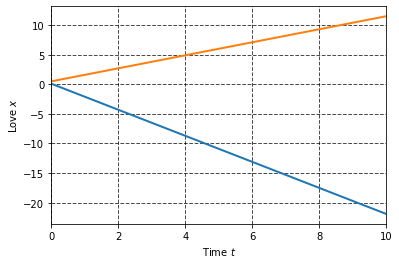

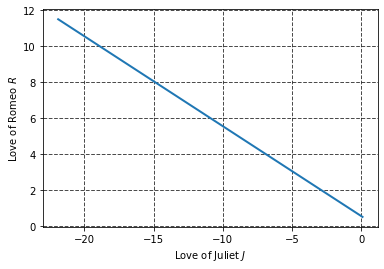

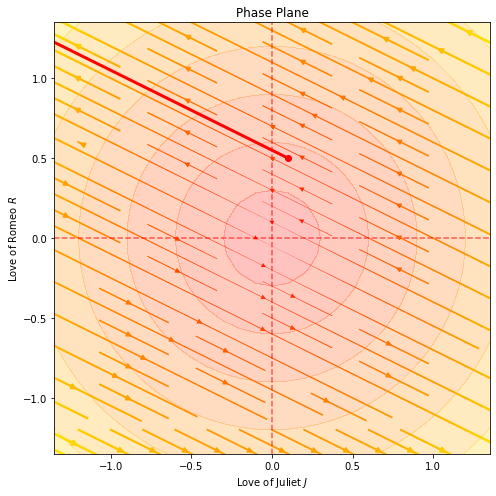

In [29]:
a, b, c, d = -2, -4, 1, 2

def f(x, t):
    J, R = x[0], x[1]
    
    dJ = a*J +b*R
    dR = c*J + d*R
    return dJ, dR

t0 = 0 # Initial time 
tf = 10 # Final time
t = np.linspace(t0, tf, 1000)

x0 = 0.1,0.5  # initial state

solution = {"ss": odeint(f, x0, t)}
J, R = solution['ss'][:,0], solution['ss'][:,1]
plot(t, solution['ss'], linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Love ${x}$')
xlabel(r'Time $t$')
show()

plot(J, R, linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlabel(r'Love of Juliet ${J}$')
ylabel(r'Love of Romeo ${R}$')
show()

J_e_max, R_e_max = 1.5, 1.5
J_e_span = np.arange(-J_e_max,J_e_max,0.1)
R_e_span = np.arange(-R_e_max,R_e_max,0.1)
J_e_grid, R_e_grid = np.meshgrid(J_e_span, R_e_span)

figure(figsize=(7, 7))
title('Phase Plane')
# Varying color along a streamline
L = (J_e_grid**2 + R_e_grid**2)**0.5
lw = 3*L / L.max()
contourf(J_e_span, R_e_span, L, cmap='autumn', alpha = 0.25)

dJ, dR = f([J_e_grid, R_e_grid],t)

strm = streamplot(J_e_span, R_e_span, dJ, dR, density = 1,color=L, cmap='autumn', linewidth = lw)
seed_points = np.array([x0[0], x0[1]])

plot(J, R, 'r-', lw = 3.0)
plot(seed_points[0], seed_points[1], 'ro', lw = 10)
hlines(0, -J_e_max, J_e_max,color = 'red', linestyle = '--', alpha = 0.6)
vlines(0, -R_e_max, R_e_max,color = 'red', linestyle = '--', alpha = 0.6)
xlim([-0.9*J_e_max,0.9*J_e_max])
ylim([-0.9*R_e_max,0.9*R_e_max])
xlabel(r'Love of Juliet ${J}$')
ylabel(r'Love of Romeo ${R}$')
tight_layout()
show()